In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## DigitRecognizer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import os

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test  = pd.read_csv("../input/digit-recognizer/test.csv")

In [6]:
print('train.shape  :', train.shape)
print('test.shape   :', test.shape)

train.shape  : (42000, 785)
test.shape   : (28000, 784)


In [7]:
def compare_columns(df0, df1):
    
    df0_columns_set = set(df0.columns)
    df1_columns_set = set(df1.columns)
    
    print(f"The column(s) in the first dataframe that is not in the second dataframe is: {df0_columns_set-df1_columns_set}")
    
    print(f"\nThe column(s) in the second dataframe that is not in the first dataframe is: {df1_columns_set-df0_columns_set}")

In [8]:
compare_columns(train, test)

The column(s) in the first dataframe that is not in the second dataframe is: {'label'}

The column(s) in the second dataframe that is not in the first dataframe is: set()


In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [13]:
train.describe().T.sample(10)

,count,mean,std,min,25%,50%,75%,max
pixel51,42000.0,0.005048,0.964042,0.0,0.0,0.0,0.0,197.0
pixel474,42000.0,0.188595,5.531666,0.0,0.0,0.0,0.0,254.0
pixel634,42000.0,45.731952,86.792598,0.0,0.0,0.0,30.0,255.0
pixel325,42000.0,108.003881,110.069725,0.0,0.0,66.0,245.0,255.0
pixel106,42000.0,1.091905,14.112597,0.0,0.0,0.0,0.0,255.0
pixel116,42000.0,0.088262,3.398975,0.0,0.0,0.0,0.0,226.0
pixel311,42000.0,1.287857,15.684168,0.0,0.0,0.0,0.0,255.0
pixel90,42000.0,0.235833,6.543342,0.0,0.0,0.0,0.0,255.0
pixel691,42000.0,7.313071,37.426752,0.0,0.0,0.0,0.0,255.0
pixel38,42000.0,0.129571,4.992894,0.0,0.0,0.0,0.0,255.0


In [14]:
test.describe().T.sample(10)

,count,mean,std,min,25%,50%,75%,max
pixel51,28000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel12,28000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel21,28000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel667,28000.0,0.938214,12.739858,0.0,0.0,0.0,0.0,255.0
pixel237,28000.0,122.683179,111.220499,0.0,0.0,118.0,252.0,255.0
pixel636,28000.0,16.588214,55.257803,0.0,0.0,0.0,0.0,255.0
pixel537,28000.0,21.295429,63.766922,0.0,0.0,0.0,0.0,255.0
pixel481,28000.0,18.457786,58.886580,0.0,0.0,0.0,0.0,255.0
pixel319,28000.0,94.662357,108.728456,0.0,0.0,20.0,229.0,255.0
pixel143,28000.0,0.076429,3.249082,0.0,0.0,0.0,0.0,255.0


In [15]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_test = test
del train, test

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


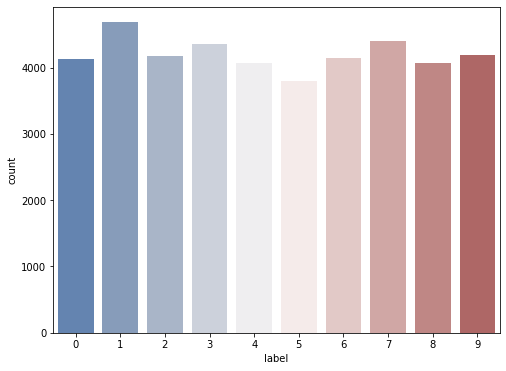

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(Y_train, palette='vlag');    

In [17]:
X_train.isnull().sum().unique()

array([0])

In [18]:
X_test.isnull().sum().unique()

array([0])

In [19]:
Y_train.isnull().sum()

0

In [20]:
X_train = X_train / 255.0
X_test  = X_test  / 255.0

In [21]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test  = X_test.values.reshape(-1, 28, 28, 1)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Lambda, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks           import ReduceLROnPlateau

In [23]:
data_gen = ImageDataGenerator(
                rotation_range=10, 
                zoom_range = 0.1,
                width_shift_range=0.1,  
                height_shift_range=0.1,
            )
data_gen.fit(X_train)

In [24]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [26]:
print('X_train.shape  :', X_train.shape)
print('X_val.shape    :', X_val.shape)
print('Y_train.shape  :', Y_train.shape)
print('Y_val.shape    :', Y_val.shape)

X_train.shape  : (37800, 28, 28, 1)
X_val.shape    : (4200, 28, 28, 1)
Y_train.shape  : (37800, 10)
Y_val.shape    : (4200, 10)


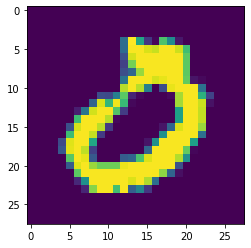

In [27]:
plt.imshow(X_train[9][:, :, 0])

In [28]:
Y_train[9]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
mean_px = X_train.mean().astype(np.float32)
std_px  = X_train.std().astype(np.float32)

In [30]:
def conv_nn_with_batch_normalization_model(optimizer):
    model= Sequential()
    model.add(Lambda(lambda x: (x-mean_px)/std_px, input_shape=(28,28,1)))
    model.add(Conv2D(32,(3,3), activation='relu')),
    model.add(BatchNormalization(axis=1)),
    model.add(Conv2D(32,(3,3), activation='relu')),
    model.add(MaxPool2D()),
    model.add(BatchNormalization(axis=1)),
    model.add(Conv2D(64,(3,3), activation='relu')),
    model.add(BatchNormalization(axis=1)),
    model.add(Conv2D(64,(3,3), activation='relu')),
    model.add(MaxPool2D()),
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization()),
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [31]:
def fit_model(model, lr_reduction, epochs=10, batch_size=100):
    batches = data_gen.flow(X_train,Y_train, batch_size=batch_size)
    history = model.fit_generator(generator = batches,
                                  epochs = epochs,
                                  validation_data = (X_val,Y_val),
                                  steps_per_epoch = batch_size,
                                  validation_steps = batch_size,
                                  callbacks = [lr_reduction],
                                 )
    return model, history

In [32]:
def apply_learning_algorithm(model):
    lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, factor=0.5, min_lr=0.00001)
    model, history = fit_model(model, lr_reduction, epochs=30, batch_size=75)
    return model, history

In [33]:
models = [conv_nn_with_batch_normalization_model(RMSprop(learning_rate=0.001)), 
          conv_nn_with_batch_normalization_model(Adam(learning_rate=0.001))]

2023-01-16 09:29:09.507902: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [34]:
model_names = ["conv_nn_with_batch_normalization_model(RMSprop(lr=0.001))",
               "conv_nn_with_batch_normalization_model(Adam(lr=0.001))"]

In [35]:
all_history, all_models = [], []
for model in models:
    fitted_model, history = apply_learning_algorithm(model)
    all_models += [fitted_model]
    all_history += [history]

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-01-16 09:29:10.010324: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
75/75 [==============================] - 10s 112ms/step - loss: 0.5221 - accuracy: 0.8395 - val_loss: 1.4883 - val_accuracy: 0.4886
Epoch 2/30
75/75 [==============================] - 9s 116ms/step - loss: 0.2041 - accuracy: 0.9340 - val_loss: 1.3252 - val_accuracy: 0.4688
Epoch 3/30
75/75 [==============================] - 8s 107ms/step - loss: 0.1427 - accuracy: 0.9554 - val_loss: 0.7212 - val_accuracy: 0.7112
Epoch 4/30
75/75 [==============================] - 8s 106ms/step - loss: 0.1172 - accuracy: 0.9607 - val_loss: 0.1690 - val_accuracy: 0.9533
Epoch 5/30
75/75 [==============================] - 9s 119ms/step - loss: 0.1082 - accuracy: 0.9644 - val_loss: 0.0707 - val_accuracy: 0.9774
Epoch 6/30
75/75 [==============================] - 8s 110ms/step - loss: 0.0979 - accuracy: 0.9689 - val_loss: 0.1979 - val_accuracy: 0.9379
Epoch 7/30
75/75 [==============================] - 8s 108ms/step - loss: 0.0970 - accuracy: 0.9696 - val_loss: 0.0694 - val_accuracy: 0.9802
Epoch

In [36]:
final_acc = pd.DataFrame(model_names, columns = ['NN Model'])
final_acc['Accuracy'] = [max(history.history['accuracy']) for history in all_history]
final_acc

,NN Model,Accuracy
0,conv_nn_with_batch_normalization_model(RMSprop...,0.988267
1,conv_nn_with_batch_normalization_model(Adam(lr...,0.990756


In [37]:
all_models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 32)        48        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        1

In [38]:
rmsprop_hist = all_history[0]
adam_hist = all_history[1]

In [39]:
def loss_accuracy_plot(history, optimizer_name):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, label="train", c='r')
    plt.plot(epochs, val_acc, label="validation", c='orange')
    plt.legend()
    plt.title(f"Training and validation accuracy for {epochs} epochs using {optimizer_name}")
    plt.figure()
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.plot(epochs, loss, label="train", c='r')
    plt.plot(epochs, val_loss, label="validation", c='orange')
    plt.legend()
    plt.title(f"Training and validation loss for {epochs} epochs using {optimizer_name}")

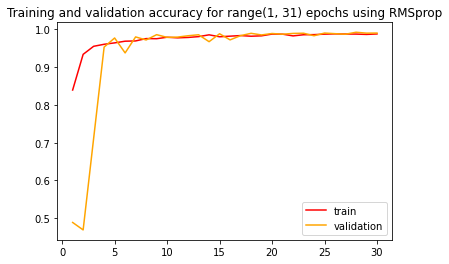

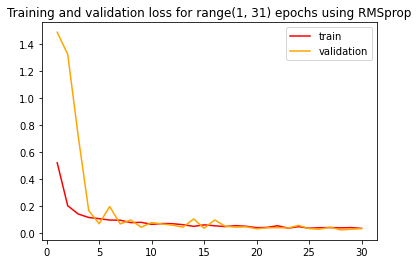

In [40]:
loss_accuracy_plot(rmsprop_hist, 'RMSprop')

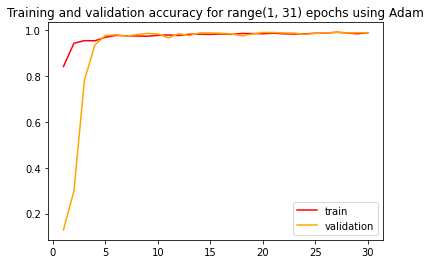

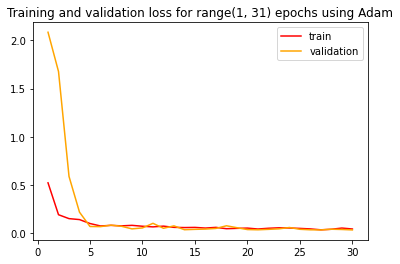

In [41]:
loss_accuracy_plot(adam_hist, 'Adam')

In [42]:
predictions = np.argmax(all_models[0].predict(X_test),axis = 1)
submission = pd.DataFrame()
submission["ImageId"] = range(1, 28001)
submission["Label"] = predictions

In [43]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [44]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)